In [1]:
import numpy as np
import pandas as pd
import re
import nltk #natural language tool kit
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("C:\\Users\\chand\\OneDrive\\Desktop\\Research Work\\spam.csv", encoding="latin-1")

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
302,ham,Oh and by the way you do have more food in you...,NaN,NaN,NaN
4032,ham,I am taking you for italian food. How about a ...,NaN,NaN,NaN
1633,ham,Yesterday its with me only . Now am going home.,NaN,NaN,NaN
4217,ham,Actually i'm waiting for 2 weeks when they sta...,NaN,NaN,NaN
2614,ham,"Sir, hope your day is going smoothly. i really...",NaN,NaN,NaN
3554,spam,From next month get upto 50% More Calls 4 Ur s...,NaN,NaN,NaN
3923,ham,How? Izzit still raining?,NaN,NaN,NaN
4620,ham,"Received, understood n acted upon!",NaN,NaN,NaN
426,ham,aathi..where are you dear..,NaN,NaN,NaN
2870,ham,I actually did for the first time in a while. ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1155,ham,"Sorry man, accidentally left my phone on silen..."
4266,ham,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...
837,ham,"Sir, I have been late in paying rent for the p..."
5333,ham,Neither [in sterm voice] - i'm studying. All f...
377,ham,Well there's not a lot of things happening in ...


In [9]:
#renaming columns v1 and v2
df=df.rename(columns={'v1':'label','v2':'messages'})
df.head()


,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['label'] = encoder.fit_transform(df['label'])

In [12]:
df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

label       0
messages    0
dtype: int64

In [14]:
#checking for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicate values
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

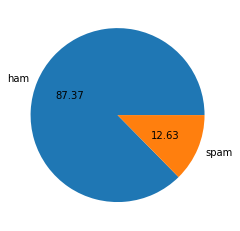

In [20]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# from the above visualization we can say the data is imbalanced

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['messages'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: messages, Length: 5169, dtype: int64

In [24]:
df['num_characters']=df['messages'].apply(len)
df.head()

,label,messages,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#number of words
df['messages'].apply(lambda x:nltk.word_tokenize(x))
#breaking the sms message on the basis of words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: messages, Length: 5169, dtype: object

In [26]:
#to see number of words used in sms 
df['num_words'] = df['messages'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,label,messages,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
#to see number of sentence
df['messages'].apply(lambda x:nltk.sent_tokenize(x))
#divides on the basis of sentence

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: messages, Length: 5169, dtype: object

In [29]:
df['num_sentence'] = df['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,label,messages,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#described output of ham messages
df[df['label'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#described output of spam messages
df[df['label'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
df[df['label'] == 0]

,label,messages,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
df[df['label'] == 0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

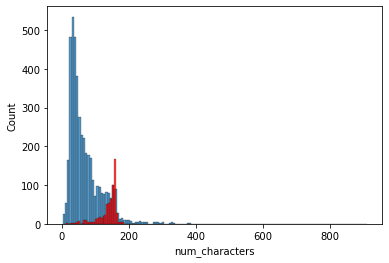

In [36]:
#plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')


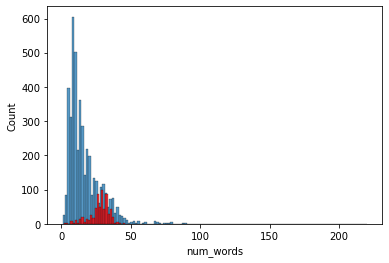

In [37]:
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')


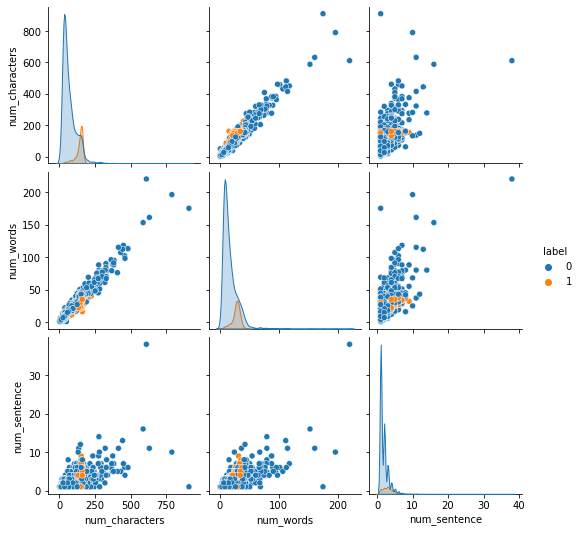

In [38]:
#relation between the columns
sns.pairplot(df,hue='label')

In [39]:
#df.corr()

In [40]:
#sns.heatmap(df.corr(),annot=True)

# Data/Text Preprocessing

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
STOPWORDS =set(stopwords.words('english'))
#it will get all the stopwords as a list

def clean_text(text):
    text = text.lower() #converting all the strings into lowercase to processes the common words
    text = re.sub(r'[^0-9a-zA-Z]',  ' ',text)
    #removing some special characters
    #remove extra spacses
    text = re.sub(r'\s+',' ', text)
    #remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text
    

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
#punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:

clean_text("Hi How Are You Rocky?")

'hi rocky'

In [45]:

clean_text("Did you Liked My presentation?")

'liked presentation'

In [46]:
#from nltk.stem.porter import PorterStemmer
#ps = PorterStemmer()
#ps.stem('Eating')

In [47]:

#transform_text("I loved youtube lectures on Machine Learning")

In [48]:
df['messages'].apply(clean_text)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: messages, Length: 5169, dtype: object

In [49]:
df['clean_text'] = df['messages'].apply(clean_text)
df.head()

,label,messages,num_characters,num_words,num_sentence,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [50]:
!pip install wordcloud


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=800,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['label'] == 1]['clean_text'].str.cat(sep=" "))

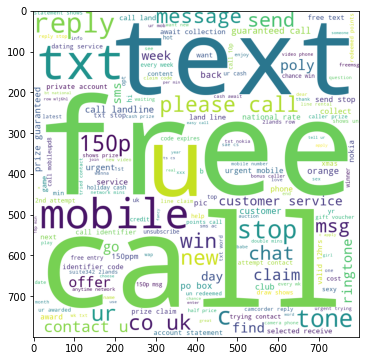

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [54]:
ham_wc = wc.generate(df[df['label'] == 0]['clean_text'].str.cat(sep=" "))

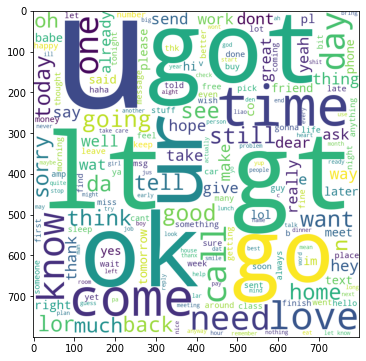

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### stemming and Lemmatization:
#### Stemming : 
Technique for normalise text
eg. words like reading,reader will be normalized to read. it dont guarantte aa proper word after stemming. 

#### Lematization:
PoS taging. it is used to remove stop words such as this,that,he...
precise capture if meaning  

In [56]:
stop_words = stopwords.words('english')
stemmer    = nltk.SnowballStemmer("english")

In [57]:
def clean_text(text):
   
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove urls
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [58]:
def preprocess_data(text):
    text = clean_text(text)                                                     # Clean puntuation, urls, and so on
    text = ' '.join(word for word in text.split() if word not in stop_words)    # Remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split())                # Stemm all the words in the sentence
    return text

In [60]:
df['message_clean'] = df['clean_text'].apply(preprocess_data)# cleaned masseges obtained 

### Bert

In [61]:
!pip install pytorch-transformers

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

In [63]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [64]:
import numpy as np

In [65]:
def bert_encode(input_text, max_len):
    input_ids = []
    attension_masks = []
    for text in input_text:
        output_dict = tokenizer.encode_plus(
            text, 
            add_special_tokens = True,
            truncation=True,
            max_length = max_len,
            pad_to_max_length = True,
            return_attention_mask = True
        )
        input_ids.append(output_dict['input_ids'])
        attension_masks.append(output_dict['attention_mask'])
    return np.array(input_ids), np.array(attension_masks)

In [74]:
text = df['messages']
target = df['clean_text']
train_input_ids, train_attention_masks = bert_encode(text, 60)

In [75]:
def create_model(bert_model):
    input_ids = tf.keras.Input(shape= (60,), dtype= 'int32')
    attention_masks = tf.keras.Input(shape= (60,), dtype= 'int32')
    
    output = bert_model([input_ids, attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32, activation= 'relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1, activation= 'sigmoid')(output)
    
    model = tf.keras.models.Model(inputs= [input_ids, attention_masks], outputs= output)
    model.compile(Adam(lr=1e-5), loss= 'binary_crossentropy', metrics= ['accuracy'])
    return model

In [76]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [77]:
model = create_model(bert_model)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 32)           24608       tf_bert_model_1[0][1]      

In [ ]:
%%time

history = model.fit(
    [train_input_ids, train_attention_masks],
    target, 
    validation_split = 0.2,
    epochs = 3,
    batch_size = 10
)

Epoch 1/3
